In [148]:
from __future__ import print_function
import ekg_data

ekg_filename = 'a02.dat'
ekg_data = ekg_data.read_ekg_data(ekg_filename)
print(ekg_data.shape)

(3182000,)


In [149]:
print("ekg_data[0]:\t", ekg_data[0])
print("ekg_data[1]:\t", ekg_data[1])
print("ekg_data.min:\t", ekg_data.min())
print("ekg_data.max:\t", ekg_data.max())
ekg_data[0]:	 -4.0
ekg_data[1]:	 -4.0
ekg_data.min:	 -572.0
ekg_data.max:	 580.0

ekg_data[0]:	 -4.0
ekg_data[1]:	 -4.0
ekg_data.min:	 -572.0
ekg_data.max:	 580.0


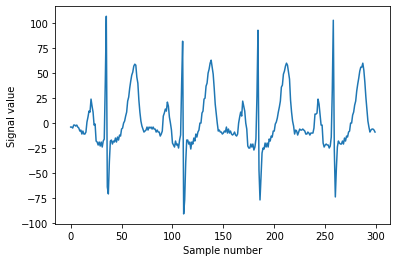

In [150]:
# IPython 'magic' command to set the matplotlib backend to display
# in the notebook
%matplotlib inline

import matplotlib.pyplot as plt

n_samples_to_plot = 300
plt.plot(ekg_data[0:n_samples_to_plot])
plt.xlabel("Sample number")
plt.ylabel("Signal value")
plt.show()

In [151]:
ekg_data = ekg_data[0:8192]

In [152]:
import numpy as np

segment_len = 32
slide_len = 2

segments = []
for start_pos in range(0, len(ekg_data), slide_len):
    end_pos = start_pos + segment_len
    # make a copy so changes to 'segments' doesn't modify the original ekg_data
    segment = np.copy(ekg_data[start_pos:end_pos])
    # if we're at the end and we've got a truncated segment, drop it
    if len(segment) != segment_len:
        continue
    segments.append(segment)

print("Produced %d waveform segments" % len(segments))

Produced 4081 waveform segments


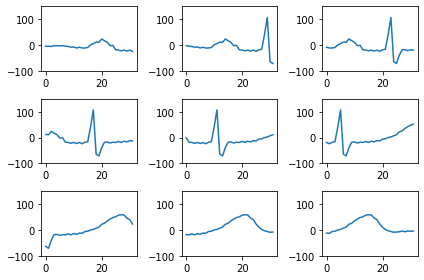

In [153]:
import learn_utils

learn_utils.plot_waves(segments, step=3)

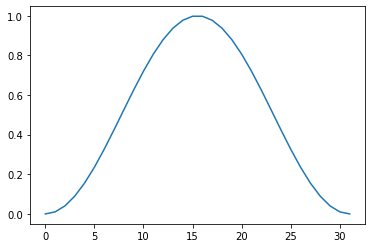

In [154]:
window_rads = np.linspace(0, np.pi, segment_len)
window = np.sin(window_rads)**2
plt.plot(window)
plt.show()

In [155]:
windowed_segments = []
for segment in segments:
    windowed_segment = np.copy(segment) * window
    windowed_segments.append(windowed_segment)

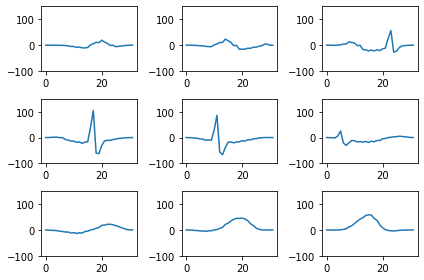

In [156]:
learn_utils.plot_waves(windowed_segments, step=3)

In [157]:
######CLustering
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=150)
clusterer.fit(windowed_segments)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=150, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

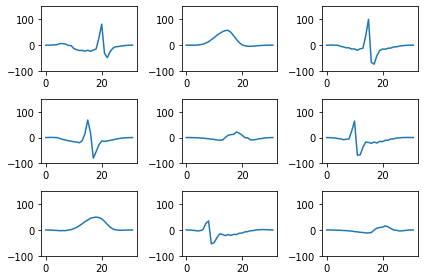

In [158]:
learn_utils.plot_waves(clusterer.cluster_centers_, step=15)

In [159]:
slide_len = segment_len//2
test_segments = learn_utils.sliding_chunker(
    ekg_data,
    window_len=segment_len,
    slide_len=slide_len
)

[-0.00000000e+00 -4.09401175e-02 -2.02605471e-01 -1.79236559e-01
 -3.11033081e-01 -7.06553985e-01 -6.52694747e-01 -1.69714444e+00
 -2.62662292e+00 -5.00261013e+00 -5.04137953e+00 -8.86658290e+00
 -7.03503249e+00 -1.03089064e+01 -1.07477659e+01 -8.97691196e+00
  9.97434662e-01  5.86241777e+00  1.12460797e+01  9.67316967e+00
  1.93452718e+01  1.22433503e+01  6.87858893e+00 -1.05064917e+00
 -4.24286111e-01 -5.87425272e+00 -4.47484190e+00 -3.42136389e+00
 -1.70274731e+00 -9.31985166e-01 -1.94465558e-01 -3.59942348e-31]


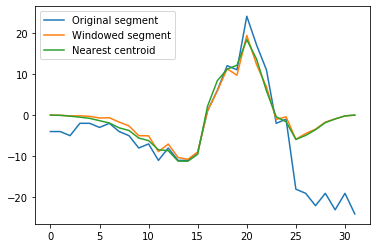

Maximum reconstruction error was 24.0
98th percentile of reconstruction error was 22.8


In [160]:
centroids = clusterer.cluster_centers_

segment = np.copy(test_segments[0])
# remember, the clustering was set up using the windowed data
# so to find a match, we should also window our search key
windowed_segment = segment * window
# predict() returns a list of centres to cope with the possibility of multiple
# samples being passed
print (windowed_segment)
nearest_centroid_idx = clusterer.predict([windowed_segment])[0]
nearest_centroid = np.copy(centroids[nearest_centroid_idx])
plt.figure()
plt.plot(segment, label="Original segment")
plt.plot(windowed_segment, label="Windowed segment")
plt.plot(nearest_centroid, label="Nearest centroid")
plt.legend()
plt.show()

error = windowed_segment - segment
error_98th_percentile = np.percentile(error, 98)
print("Maximum reconstruction error was %.1f" % error.max())
print("98th percentile of reconstruction error was %.1f" % error_98th_percentile)

[-0.00000000e+00 -4.09401175e-02 -2.02605471e-01 -1.79236559e-01
 -3.11033081e-01 -7.06553985e-01 -6.52694747e-01 -1.69714444e+00
 -2.62662292e+00 -5.00261013e+00 -5.04137953e+00 -8.86658290e+00
 -7.03503249e+00 -1.03089064e+01 -1.07477659e+01 -8.97691196e+00
  9.97434662e-01  5.86241777e+00  1.12460797e+01  9.67316967e+00
  1.93452718e+01  1.22433503e+01  6.87858893e+00 -1.05064917e+00
 -4.24286111e-01 -5.87425272e+00 -4.47484190e+00 -3.42136389e+00
 -1.70274731e+00 -9.31985166e-01 -1.94465558e-01 -3.59942348e-31]
[ 0.00000000e+00  6.14101762e-02  4.86253130e-01  9.85801073e-01
  3.73239697e+00  4.00380591e+00  3.58982111e+00 -8.48572222e-01
 -5.25324584e-01 -1.12558728e+01 -1.36837444e+01 -1.77331658e+01
 -1.67082022e+01 -2.15549861e+01 -1.85643229e+01 -2.39384319e+01
 -1.79538239e+01 -1.56331141e+01  3.74869323e+01  9.40935596e+01
 -5.15873914e+01 -5.11339924e+01 -2.43877244e+01 -9.45584252e+00
 -7.21286389e+00 -6.85329485e+00 -4.23932391e+00 -2.95481427e+00
 -1.34427419e+00 -7.6990

[-0.00000000e+00 -2.04700587e-01 -1.01302735e+00 -1.88198387e+00
 -4.04343005e+00 -4.23932391e+00 -5.22155798e+00  1.40014417e+01
  5.04311601e+01 -4.75247962e+01 -5.25743865e+01 -3.38542256e+01
 -1.75875812e+01 -1.87434662e+01 -2.54038103e+01 -1.89512586e+01
 -1.89512586e+01 -1.36789748e+01 -1.96806395e+01 -1.31906859e+01
 -1.37029009e+01 -8.64236491e+00 -6.87858893e+00 -3.67727209e+00
 -1.69714444e+00 -6.52694747e-01  2.35517995e-01  1.39964886e+00
  8.96182794e-01  9.31985166e-01  2.55875734e-01  5.54911120e-31]
[-0.00000000e+00 -1.43290411e-01 -8.50942978e-01 -1.34427419e+00
 -2.64378119e+00 -2.82621594e+00 -3.58982111e+00 -2.97000278e+00
 -2.10129834e+00 -1.25065253e+00  7.20197076e-01  7.25447692e+00
  8.79379061e+00  2.15549861e+01  2.44267407e+01  3.69050825e+01
  3.98973865e+01  4.59222725e+01  4.68586654e+01  5.10039856e+01
  4.67510735e+01  3.81704450e+01  2.93903345e+01  1.89116850e+01
  8.91000834e+00  2.61077899e+00 -2.35517995e-01 -7.77582702e-01
 -7.16946235e-01 -3.6468

  1.79236559e+00  4.86253130e-01 -4.09401175e-02 -1.49975978e-32]
[ 0.00000000e+00  1.84230529e-01  1.13459064e+00  3.13663978e+00
  5.75411200e+00  1.13048638e+01  1.86018003e+01  2.67300250e+01
  2.94181767e+01  3.62689234e+01  3.88906421e+01  3.22421197e+01
  1.75875812e+01  1.12460797e+01 -3.90827851e+00 -9.97434662e-01
 -5.98460797e+00 -5.86241777e+00 -1.21832530e+01 -5.27627437e+00
 -6.44842393e+00 -7.20197076e+00 -3.75195760e+00 -2.10129834e+00
 -3.81857500e+00 -2.28443162e+00 -1.88414396e+00 -4.66549621e-01
 -5.37709676e-01 -3.64689848e-01 -1.12585323e-01 -1.34978380e-31]
[-0.00000000e+00 -6.14101762e-02 -5.26774224e-01 -5.37709676e-01
 -1.24413232e+00 -2.35517995e+00 -1.95808424e+00 -1.69714444e+00
 -4.72792126e+00 -4.37728386e+00 -5.76157661e+00 -2.41815897e+00
 -5.27627437e+00 -8.43455977e+00 -1.07477659e+01 -8.97691196e+00
 -1.19692159e+01 -7.81655703e+00 -9.37173308e+00  0.00000000e+00
  4.83631795e+00  8.64236491e+00  8.12924146e+00  1.52344129e+01
  9.75858056e+00  4.242

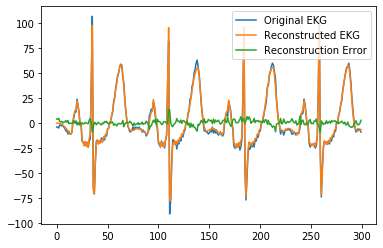

In [161]:
reconstruction = np.zeros(len(ekg_data))
slide_len = segment_len//2

for segment_n, segment in enumerate(test_segments):
    # don't modify the data in segments
    segment = np.copy(segment)
    segment *= window
    print (segment)
    nearest_centroid_idx = clusterer.predict([segment])[0]
    centroids = clusterer.cluster_centers_
    nearest_centroid = np.copy(centroids[nearest_centroid_idx])
    
    # overlay our reconstructed segments with an overlap of half a segment
    pos = segment_n * slide_len
    reconstruction[pos:pos+segment_len] += nearest_centroid

n_plot_samples = 300

error = reconstruction[0:n_plot_samples] - ekg_data[0:n_plot_samples]
error_98th_percentile = np.percentile(error, 98)
print("Maximum reconstruction error was %.1f" % error.max())
print("98th percentile of reconstruction error was %.1f" % error_98th_percentile)

plt.plot(ekg_data[0:n_plot_samples], label="Original EKG")
plt.plot(reconstruction[0:n_plot_samples], label="Reconstructed EKG")
plt.plot(error[0:n_plot_samples], label="Reconstruction Error")
plt.legend()
plt.show()

In [162]:
ekg_data_anomalous = np.copy(ekg_data)
ekg_data_anomalous[210:215] = 0

Maximum reconstruction error was 55.8
98th percentile of reconstruction error was 13.1


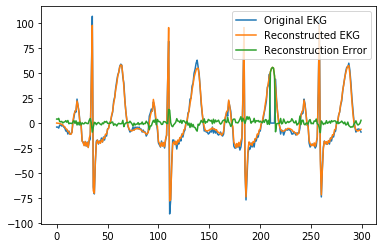

In [163]:
recontruction = \
    learn_utils.reconstruct(ekg_data_anomalous, window, clusterer)
    
error = reconstruction[0:n_plot_samples] - ekg_data_anomalous[0:n_plot_samples]
error_98th_percentile = np.percentile(error, 98)
print("Maximum reconstruction error was %.1f" % error.max())
print("98th percentile of reconstruction error was %.1f" % error_98th_percentile)

plt.plot(ekg_data_anomalous[0:n_plot_samples], label="Original EKG")
plt.plot(reconstruction[0:n_plot_samples], label="Reconstructed EKG")
plt.plot(error[0:n_plot_samples], label="Reconstruction Error")
plt.legend()
plt.show()

In [164]:
from sklearn.decomposition import PCA
import pandas as pd
x = windowed_segments
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
PCASegments = principalDf.values.tolist()

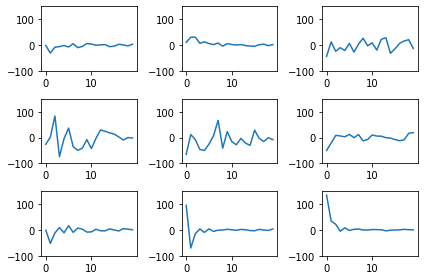

In [165]:
learn_utils.plot_waves(PCASegments, step=3)

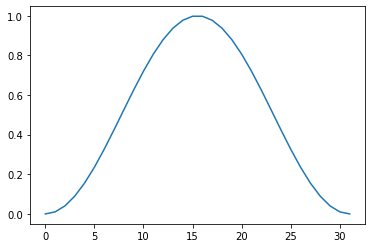

In [166]:
window_radsPCA = np.linspace(0, np.pi, len(PCASegments[0]))
windowPCA = np.sin(window_radsPCA)**2
plt.plot(window)
plt.show()

In [167]:
######CLustering
from sklearn.cluster import KMeans

clustererPCA = KMeans(n_clusters=150)
clustererPCA.fit(PCASegments)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=150, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

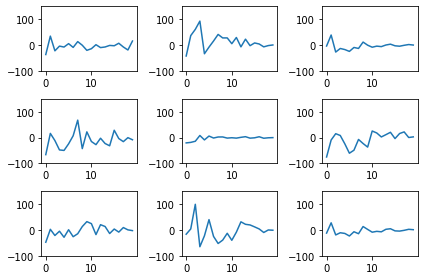

In [168]:
learn_utils.plot_waves(clustererPCA.cluster_centers_, step=15)

In [169]:
slide_len = len(PCASegments[0])//2
PCASegments_test = learn_utils.sliding_chunker(
    ekg_data,
    window_len=len(PCASegments[0]),
    slide_len=slide_len
)

In [170]:
from sklearn.decomposition import PCA
import pandas as pd
x = test_segments
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
PCASegments_test = principalDf.values.tolist()

[-0.00000000e+00  2.44380878e-01 -4.62885501e+00  1.11478315e+01
  5.94942626e-02 -2.96957042e+00  4.17961583e+00 -1.68033030e+00
 -5.63828430e+00 -7.40041063e+00 -2.60829544e+00  5.89487836e+00
 -1.33752565e+00  2.92859511e+00  4.92899945e+00  1.22754142e+00
 -1.30698456e-01 -7.83807081e-01  9.09346397e-04 -9.84401947e-32]


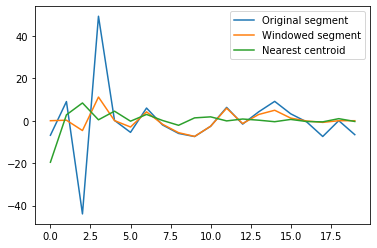

Maximum reconstruction error was 39.3
98th percentile of reconstruction error was 27.0


In [171]:
centroidsPCA = clustererPCA.cluster_centers_

segment = np.copy(PCASegments_test[0])
# remember, the clustering was set up using the windowed data
# so to find a match, we should also window our search key
windowed_segment = segment * windowPCA
# predict() returns a list of centres to cope with the possibility of multiple
# samples being passed
print (windowed_segment)
nearest_centroid_idx = clustererPCA.predict([windowed_segment])[0]
nearest_centroid = np.copy(centroidsPCA[nearest_centroid_idx])
plt.figure()
plt.plot(segment, label="Original segment")
plt.plot(windowed_segment, label="Windowed segment")
plt.plot(nearest_centroid, label="Nearest centroid")
plt.legend()
plt.show()

error = windowed_segment - segment
error_98th_percentile = np.percentile(error, 98)
print("Maximum reconstruction error was %.1f" % error.max())
print("98th percentile of reconstruction error was %.1f" % error_98th_percentile)


In [ ]:
reconstruction = np.zeros(len(ekg_data))
slide_len = len(PCASegments[0])//2

for segment_n, segment in enumerate(PCASegments_test):
    # don't modify the data in segments
    segment = np.copy(PCASegments_test)
    windowed_segment = segment * windowPCA
    print(windowed_segment[0])
    nearest_centroid_idx = clustererPCA.predict([windowed_segment])[0]
    centroidsPCA = clustererPCA.cluster_centers_
    nearest_centroid = np.copy(centroidsPCA[nearest_centroid_idx])
    
    # overlay our reconstructed segments with an overlap of half a segment
    pos = segment_n * slide_len
    reconstruction[pos:pos+segment_len] += nearest_centroid

n_plot_samples = 300

error = reconstruction[0:n_plot_samples] - ekg_data[0:n_plot_samples]
error_98th_percentile = np.percentile(error, 98)
print("Maximum reconstruction error was %.1f" % error.max())
print("98th percentile of reconstruction error was %.1f" % error_98th_percentile)

plt.plot(ekg_data[0:n_plot_samples], label="Original EKG")
plt.plot(reconstruction[0:n_plot_samples], label="Reconstructed EKG")
plt.plot(error[0:n_plot_samples], label="Reconstruction Error")
plt.legend()
plt.show()

In [ ]:
print(PCASegments_test)